# Importing Packages

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Dataset

In [487]:
traffic_data = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')

In [488]:
print(traffic_data)

               ID   Source  Severity                     Start_Time  \
0       A-2047758  Source2         2            2019-06-12 10:10:56   
1       A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2       A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3       A-4237356  Source1         2            2022-02-21 17:43:04   
4       A-6690583  Source1         2            2020-12-04 01:46:00   
...           ...      ...       ...                            ...   
499995  A-6077227  Source1         2            2021-12-15 07:30:00   
499996  A-6323243  Source1         2            2021-12-19 16:25:00   
499997  A-3789256  Source1         2            2022-04-13 19:28:29   
499998  A-7030381  Source1         3            2020-05-15 17:20:56   
499999  A-5438901  Source1         2            2022-04-02 23:23:13   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
0                 2019-06-12 10:55:58  30.641211  -91.153481        NaN 

# Data Cleaning

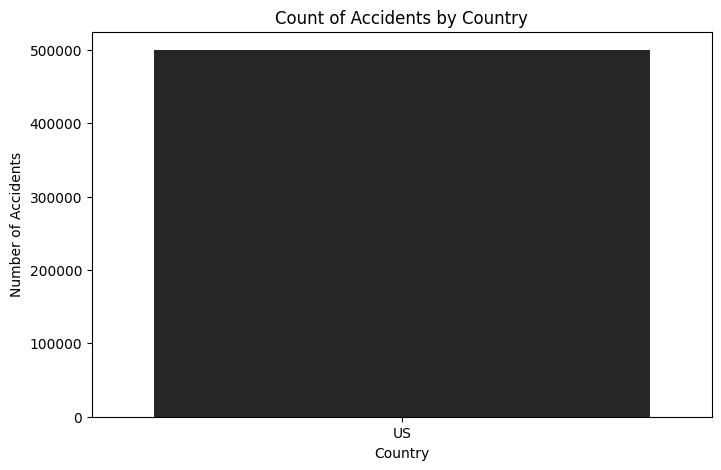

In [489]:
# Bar chart of country
country_counts = traffic_data['Country'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark:skyblue')

plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Country")
plt.show()

## Drop useless columns

In [490]:
traffic_data = traffic_data.drop(['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Description'], axis=1)
print(traffic_data.shape)

(500000, 30)


## Removing Missing Values

In [491]:
print(traffic_data.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'City',
       'State', 'Zipcode', 'Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop'],
      dtype='object')


In [492]:
missing_values = traffic_data.isnull().sum()
print(missing_values[missing_values > 0], '\n')

missing_percentage = (traffic_data.isna().sum() / len(traffic_data)) * 100
print(missing_percentage.sort_values(ascending=False))

City                     19
Zipcode                 116
Weather_Timestamp      7674
Temperature(F)        10466
Humidity(%)           11130
Pressure(in)           8928
Visibility(mi)        11291
Wind_Direction        11197
Wind_Speed(mph)       36987
Precipitation(in)    142616
Weather_Condition     11101
dtype: int64 

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Pressure(in)          1.7856
Weather_Timestamp     1.5348
Zipcode               0.0232
City                  0.0038
ID                    0.0000
Distance(mi)          0.0000
Severity              0.0000
State                 0.0000
Start_Time            0.0000
End_Time              0.0000
Amenity               0.0000
Bump                  0.0000
Crossing              0.0000
Give_Way              0.0000
Junction              0.0000
No_Exit               0.0000
Railway   

In [493]:
traffic_data_cleaned = traffic_data.dropna()
print(traffic_data_cleaned.shape)

(348687, 30)


## Data Sampling

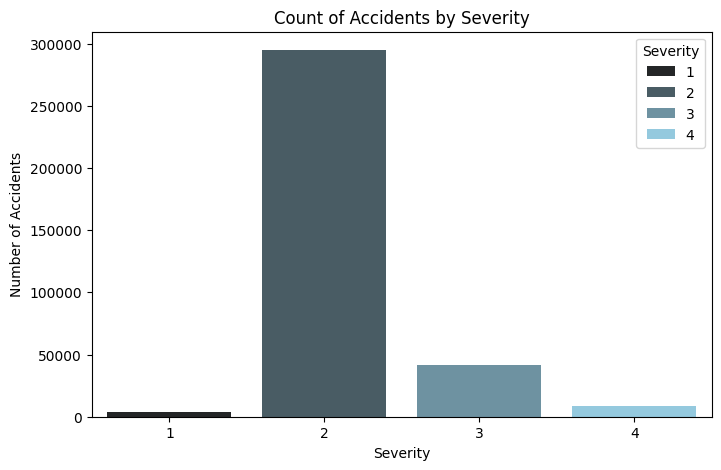

In [494]:
# Bar chart of severity
severity_counts = traffic_data_cleaned['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Severity")
plt.show()

In [495]:
print(severity_counts.values)
print(severity_counts.index)

[294796  41575   8388   3928]
Index([2, 3, 4, 1], dtype='int64', name='Severity')


### Random Sampling for Valid-Test set
Sample valid and test set first to keep original class distribution

In [496]:
valid_test_df = traffic_data_cleaned.sample(n=2000, random_state=42)

## dropped rows of data that are being used for valid-test set
remaining_df = traffic_data_cleaned.drop(valid_test_df.index)

print(valid_test_df.shape)

# valid_df, test_df = train_test_split(valid_test_df, test_size=0.5, random_state=42)

(2000, 30)


In [497]:
print(len(remaining_df))

346687


### Stratefied Sampling for Training set to ensure balanced training data
Use the remaining dataset from previous step, avoid overlapping data in train-test sets

In [498]:
train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

print(train_df.shape)
# remaining_df = traffic_data_cleaned.drop(train_df.index)

(8000, 30)


<ipython-input-498-17042f7aea20>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


### Random Sampling for 20k Test Set
Use the remaining dataset from previous step, avoid overlapping data in train-test sets

In [499]:
remaining_df = remaining_df.drop(train_df.index)
print(remaining_df.shape)

(338687, 30)


In [500]:
test_20k_df = remaining_df.sample(n=20000, random_state=42)
print(test_20k_df.shape)

(20000, 30)


### Visualize Class Distribution

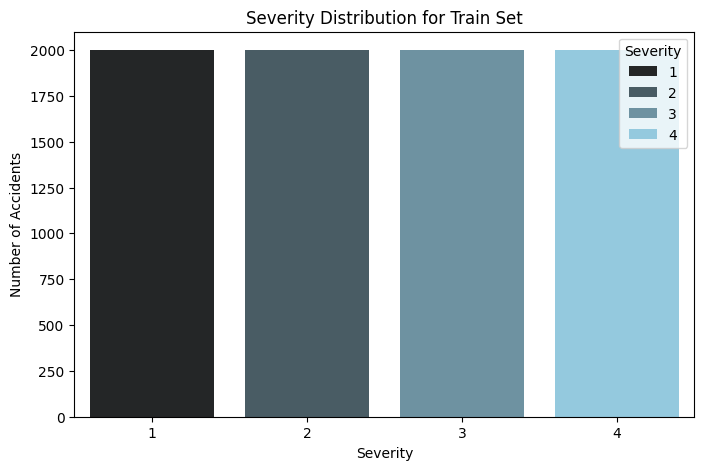

In [501]:
# Bar chart of severity
severity_counts = train_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Train Set")
plt.show()

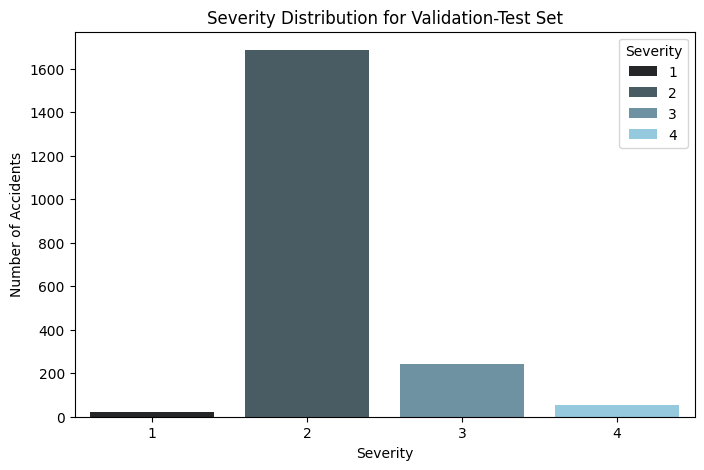

In [502]:
severity_counts = valid_test_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Validation-Test Set")
plt.show()

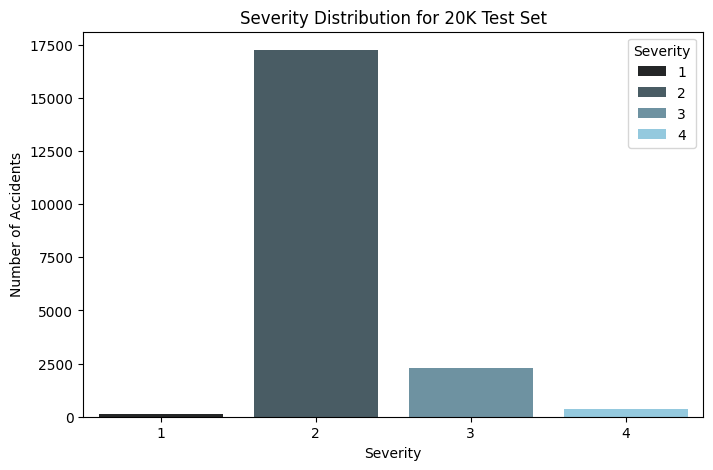

In [503]:
severity_counts = test_20k_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for 20K Test Set")
plt.show()

# Data Preparation

In [504]:
## Combine the dataset first since we would need to go through some standardized data preprocessing
sampled_data = pd.concat([train_df, valid_test_df], axis=0)
print(sampled_data.shape)

(10000, 30)


In [505]:
# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

#Convert Start_Time to datetime
sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

# Do the same on the 20k Test Set
test_20k_df['Start_Time'] = test_20k_df['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
test_20k_df['Start_Time'] = pd.to_datetime(test_20k_df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
print(test_20k_df['Start_Time'].dtype)

object
datetime64[ns]
datetime64[ns]


In [506]:
# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

#Convert End_Time to datetime
sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

# Do the same on the 20k Test Set
test_20k_df['End_Time'] = test_20k_df['End_Time'].str.split('.').str[0]  # Remove nanoseconds
test_20k_df['End_Time'] = pd.to_datetime(test_20k_df['End_Time'], format='%Y-%m-%d %H:%M:%S')
print(test_20k_df['End_Time'].dtype)

object
datetime64[ns]
datetime64[ns]


## Compute Duration Column using Start_Time and End_Time

In [507]:
sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']

print(sampled_data['Duration'])

239235   0 days 00:30:00
355666   0 days 00:15:00
246955   0 days 00:29:40
264362   0 days 00:29:36
195152   0 days 01:16:59
               ...      
395634   0 days 02:11:15
492951   0 days 05:10:04
15664    0 days 01:39:00
393801   0 days 00:36:00
423606   0 days 01:51:30
Name: Duration, Length: 10000, dtype: timedelta64[ns]


In [508]:
#Do the same for 20k Test Set
test_20k_df['Duration'] = test_20k_df['End_Time'] - test_20k_df['Start_Time']
print(test_20k_df['Duration'])

236564   0 days 00:29:42
173706   0 days 01:19:05
248802   0 days 00:27:30
437866   0 days 01:14:31
87250    0 days 02:07:05
               ...      
496433   0 days 02:02:35
129370   0 days 06:00:00
304149   0 days 00:29:18
280611   0 days 01:22:52
4458     0 days 00:28:12
Name: Duration, Length: 20000, dtype: timedelta64[ns]


In [509]:
# duration in minutes
sampled_data['Duration'] = sampled_data['Duration'].dt.total_seconds() / 60

print(sampled_data['Duration'])

239235     30.000000
355666     15.000000
246955     29.666667
264362     29.600000
195152     76.983333
             ...    
395634    131.250000
492951    310.066667
15664      99.000000
393801     36.000000
423606    111.500000
Name: Duration, Length: 10000, dtype: float64


In [510]:
#Do the same for 20k Test Set
test_20k_df['Duration'] = test_20k_df['Duration'].dt.total_seconds() / 60
print(test_20k_df['Duration'])

236564     29.700000
173706     79.083333
248802     27.500000
437866     74.516667
87250     127.083333
             ...    
496433    122.583333
129370    360.000000
304149     29.300000
280611     82.866667
4458       28.200000
Name: Duration, Length: 20000, dtype: float64


## Data Encoding for Start_Time Column (convert to minutes after midnight)

In [511]:
#Convert to Minutes After Midnight
sampled_data['Start_Time'] = (
    sampled_data['Start_Time'].dt.hour * 60 + sampled_data['Start_Time'].dt.minute
)

print(sampled_data['Start_Time'])

239235      33
355666     484
246955     809
264362     458
195152     349
          ... 
395634     861
492951     354
15664     1251
393801     832
423606     413
Name: Start_Time, Length: 10000, dtype: int32


In [512]:
# Do the same for 20k Test Set
test_20k_df['Start_Time'] = (
    test_20k_df['Start_Time'].dt.hour * 60 + test_20k_df['Start_Time'].dt.minute
)
print(test_20k_df['Start_Time'])

236564    1087
173706      84
248802    1409
437866     716
87250     1359
          ... 
496433    1061
129370     528
304149    1056
280611     417
4458       719
Name: Start_Time, Length: 20000, dtype: int32


## Data Encoding for End_Time Column (convert to minutes after midnight)

In [513]:
#Convert to Minutes After Midnight
sampled_data['End_Time'] = (
    sampled_data['End_Time'].dt.hour * 60 + sampled_data['End_Time'].dt.minute
)

print(sampled_data['End_Time'])

239235      63
355666     499
246955     839
264362     488
195152     426
          ... 
395634     992
492951     664
15664     1350
393801     868
423606     525
Name: End_Time, Length: 10000, dtype: int32


In [514]:
# Do the same for 20k Test Set
test_20k_df['End_Time'] = (
    test_20k_df['End_Time'].dt.hour * 60 + test_20k_df['End_Time'].dt.minute
)
print(test_20k_df['End_Time'])

236564    1117
173706     163
248802    1436
437866     791
87250       46
          ... 
496433    1183
129370     888
304149    1085
280611     500
4458       747
Name: End_Time, Length: 20000, dtype: int32


## Encode Zipcode into Region using First Digit

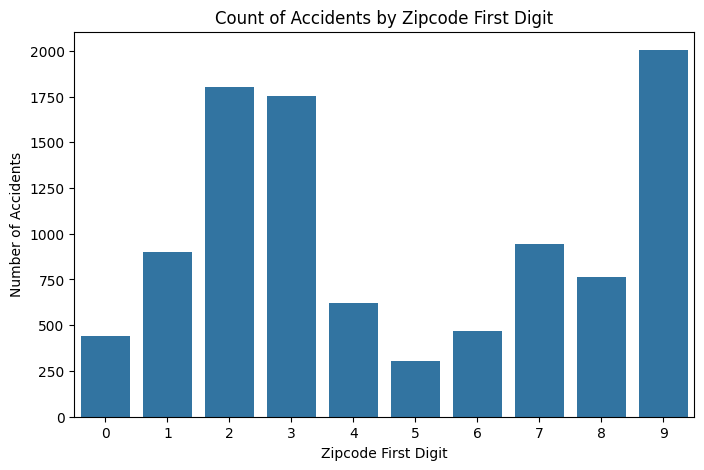

In [515]:
# Bar chart of zipcode
# Extract the first digit of the zip code (assuming the zip code is a string or integer)
sampled_data['Region'] = sampled_data['Zipcode'].str[0]

zipcode_counts = sampled_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

In [516]:
sampled_data['Region'] = sampled_data['Region'].astype(int)

In [517]:
print(sampled_data.shape)
sampled_data.drop(columns=['Zipcode'], inplace=True)
print(sampled_data.shape)


(10000, 32)
(10000, 31)


In [518]:
test_20k_df['Region'] = test_20k_df['Zipcode'].str[0]
test_20k_df['Region'] = test_20k_df['Region'].astype(int)

In [519]:
print(test_20k_df.shape)
test_20k_df.drop(columns=['Zipcode'], inplace=True)
print(test_20k_df.shape)

(20000, 32)
(20000, 31)


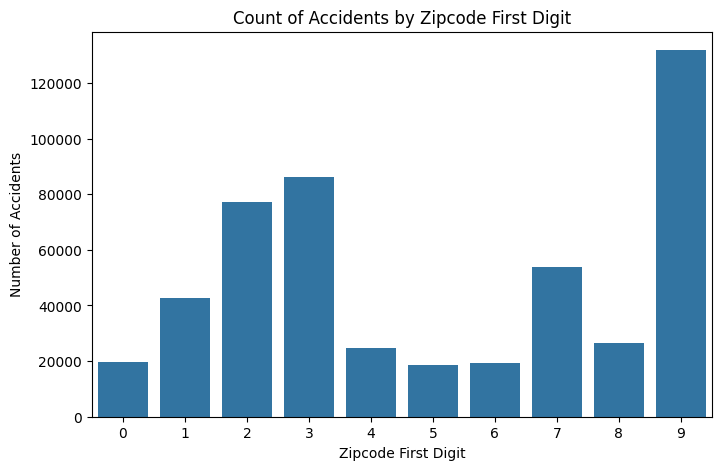

In [520]:
## Compare the distribution with original dataset
traffic_data['Region'] = traffic_data['Zipcode'].str[0]

zipcode_counts = traffic_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

## Encode 'State' into Top 3 States and Others

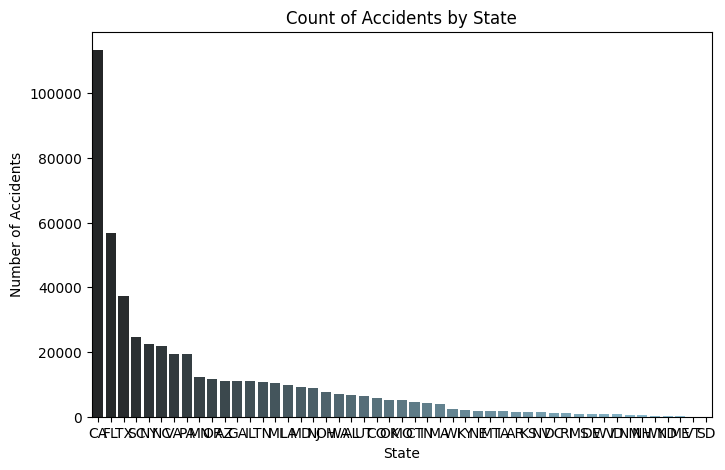

In [521]:
# Bar chart of state
## Use the original traffic data since the sampled data distribution might be distorted due to stratefied sampling
state_counts = traffic_data['State'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State")
plt.show()

In [522]:
print(sampled_data['State'].unique())

['CA' 'WA' 'NM' 'FL' 'PA' 'SC' 'NC' 'VA' 'MI' 'AZ' 'OH' 'OK' 'CO' 'AL'
 'NY' 'WI' 'TN' 'IN' 'LA' 'CT' 'GA' 'TX' 'RI' 'OR' 'MA' 'DC' 'MN' 'NJ'
 'MD' 'KY' 'IL' 'UT' 'MO' 'DE' 'KS' 'NV' 'NE' 'MS' 'ID' 'IA' 'AR' 'MT'
 'NH' 'WV' 'ME' 'VT' 'WY' 'ND' 'SD']


In [523]:
print(test_20k_df['State'].unique())

['AZ' 'NY' 'FL' 'IL' 'CA' 'OR' 'NC' 'TX' 'LA' 'MT' 'SC' 'OK' 'UT' 'MN'
 'TN' 'IN' 'PA' 'NJ' 'GA' 'VA' 'WA' 'MD' 'CT' 'MI' 'CO' 'AL' 'OH' 'ID'
 'DC' 'MA' 'AR' 'RI' 'IA' 'MS' 'MO' 'DE' 'WY' 'KS' 'ND' 'NH' 'WV' 'WI'
 'KY' 'NV' 'NM' 'ME' 'NE' 'SD']


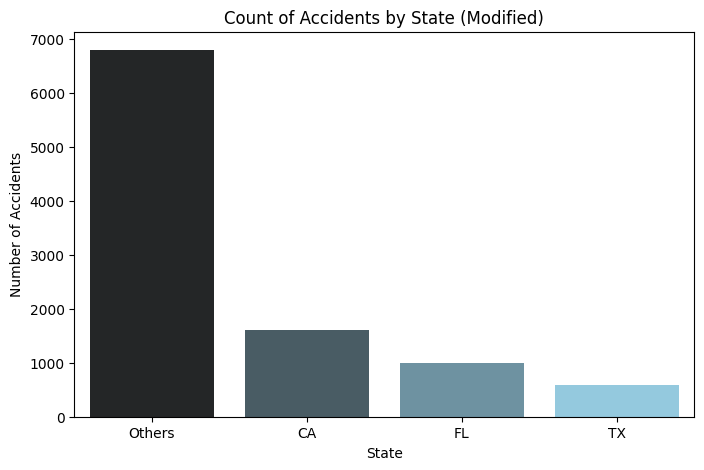

In [524]:
# Get the top 3 states
top_3 = state_counts.nlargest(3)

# Create a mapping where top 3 states are kept, and others are labeled as 'Others'
state_mapping = state_counts.index.to_series().apply(lambda x: x if x in top_3.index else 'Others')

# Apply the mapping to the 'State' column
sampled_data['State'] = sampled_data['State'].map(state_mapping)

# new Bar Chart for State
state_counts = sampled_data['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (Modified)")
plt.show()

In [525]:
# Do the same for 20k Test Set
test_20k_df['State'] = test_20k_df['State'].map(state_mapping)
print(test_20k_df['State'].unique())

['Others' 'FL' 'CA' 'TX']


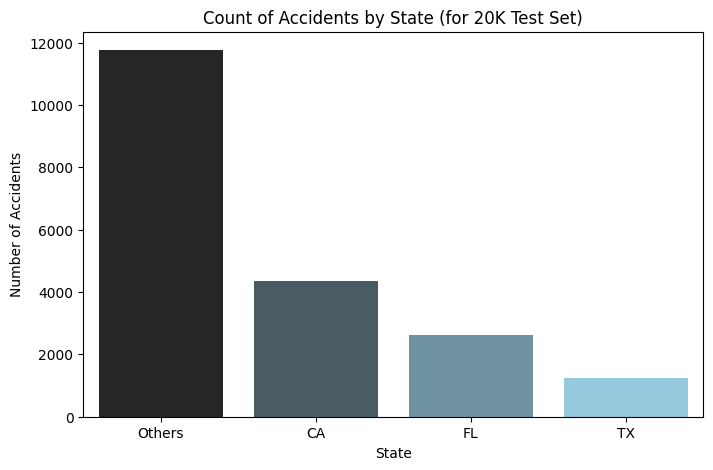

In [526]:
state_counts = test_20k_df['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (for 20K Test Set)")
plt.show()

In [527]:
# Perform One-Hot Encoding on the 'State' column
state_dummies = pd.get_dummies(sampled_data['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, state_dummies], axis=1)

# Drop the original 'State' column
sampled_data.drop(columns=['State'], inplace=True)

print(sampled_data.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)         City  \
239235  A-7056206         1          33        63          0.00  Pope Valley   
355666  A-7143912         1         484       499          0.00    Sausalito   
246955   A-540674         1         809       839          0.15       Sumner   
264362   A-633728         1         458       488          0.00  Albuquerque   
195152   A-614503         1         349       426          0.00        Miami   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  ...  \
239235  2020-06-24 00:53:00            56.0         90.0         29.71  ...   
355666  2020-03-29 07:56:00            52.0         86.0         30.10  ...   
246955  2022-08-10 13:08:00            68.0         83.0         29.71  ...   
264362  2022-04-29 07:52:00            56.0         20.0         24.61  ...   
195152  2022-05-23 05:53:00            79.0         77.0         30.07  ...   

         Stop Traffic_Calming  Traffic_Signa

In [528]:
#Do the same for 20k Test Set
state_dummies = pd.get_dummies(test_20k_df['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
test_20k_df = pd.concat([test_20k_df, state_dummies], axis=1)

# Drop the original 'State' column
test_20k_df.drop(columns=['State'], inplace=True)

print(test_20k_df.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)        City  \
236564   A-681343         2        1087      1117         0.000      Tucson   
173706  A-4161749         2          84       163         1.483    New York   
248802  A-6395391         2        1409      1436         0.912  Fort Myers   
437866  A-1305496         3         716       791         0.000     Lansing   
87250   A-3670719         2        1359        46         0.081       Chino   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  ...  \
236564  2022-03-10 17:58:00            66.0         19.0         26.99  ...   
173706  2022-02-28 01:51:00            32.0         48.0         29.96  ...   
248802  2021-02-13 23:53:00            75.0         82.0         29.91  ...   
437866  2020-09-19 11:55:00            60.0         46.0         29.74  ...   
87250   2023-02-25 22:53:00            42.0         85.0         29.25  ...   

         Stop Traffic_Calming  Traffic_Signal  Tur

## Encode 'City' into Top 5 Cities and Others

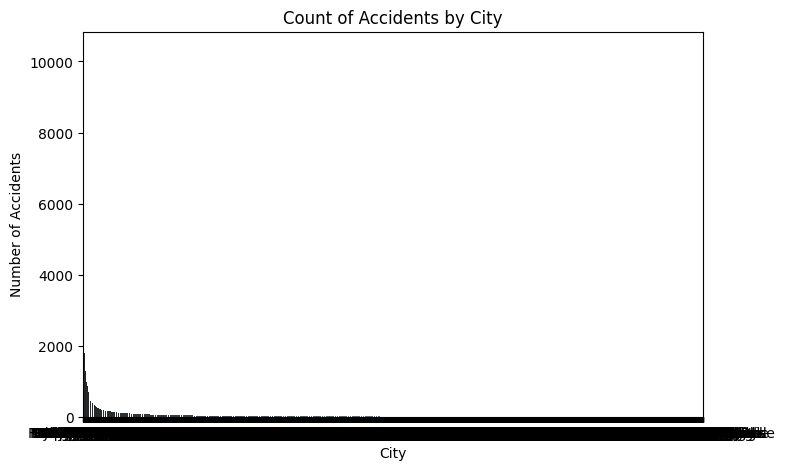

In [529]:
# Bar chart of city
## Use remaining_df (original dataset without valid-test set, to prevent data leakage and maintaining original data distribution)
city_counts = remaining_df['City'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City")
plt.show()

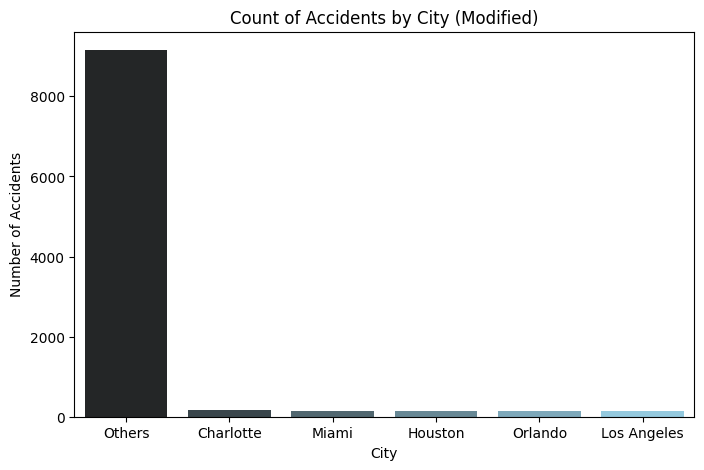

In [530]:
# Get the top 5 cities
top_5 = city_counts.nlargest(5)

# Create a mapping where top 5 cities are kept, and others are labeled as 'Others'
city_mapping = city_counts.index.to_series().apply(lambda x: x if x in top_5.index else 'Others')

# Apply the mapping to the 'City' column
sampled_data['City'] = sampled_data['City'].map(city_mapping)

# new Bar Chart for City
city_counts = sampled_data['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (Modified)")
plt.show()

['Others' 'Charlotte' 'Houston' 'Miami' 'Orlando' 'Los Angeles']


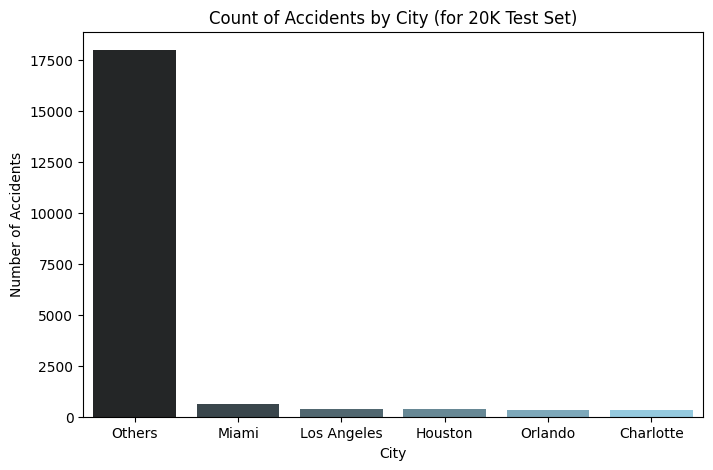

In [531]:
# Do the same for 20k Test Set
test_20k_df['City'] = test_20k_df['City'].map(city_mapping)
print(test_20k_df['City'].unique())

city_counts = test_20k_df['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (for 20K Test Set)")
plt.show()

In [532]:
# Perform One-Hot Encoding on the 'City' column
city_dummies = pd.get_dummies(sampled_data['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, city_dummies], axis=1)

# Drop the original 'City' column
sampled_data.drop(columns=['City'], inplace=True)

#print(sampled_data.head())

In [533]:
#Do the same for 20k Test Set
city_dummies = pd.get_dummies(test_20k_df['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

test_20k_df = pd.concat([test_20k_df, city_dummies], axis=1)

test_20k_df.drop(columns=['City'], inplace=True)

print(test_20k_df.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
236564   A-681343         2        1087      1117         0.000   
173706  A-4161749         2          84       163         1.483   
248802  A-6395391         2        1409      1436         0.912   
437866  A-1305496         3         716       791         0.000   
87250   A-3670719         2        1359        46         0.081   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  \
236564  2022-03-10 17:58:00            66.0         19.0         26.99   
173706  2022-02-28 01:51:00            32.0         48.0         29.96   
248802  2021-02-13 23:53:00            75.0         82.0         29.91   
437866  2020-09-19 11:55:00            60.0         46.0         29.74   
87250   2023-02-25 22:53:00            42.0         85.0         29.25   

        Visibility(mi)  ... State_CA  State_FL  State_Others State_TX  \
236564            10.0  ...        0         0             1        0   
173706

## Cluster 'Weather_Condition' into 6 Broad Categories then One-Hot Encoding


In [534]:
## Using remaining_df to get more weather_condition categories but still excluding valid and test data
print(remaining_df['Weather_Condition'].unique())

['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Fog' 'T-Storm' 'Light Snow' 'Overcast' 'Thunder'
 'Light Rain with Thunder' 'Rain' 'Showers in the Vicinity'
 'Mostly Cloudy / Windy' 'Heavy Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy T-Storm' 'Light Rain / Windy' 'Smoke' 'Blowing Dust / Windy'
 'Haze' 'N/A Precipitation' 'Thunder in the Vicinity' 'Snow'
 'Scattered Clouds' 'Heavy Thunderstorms and Rain' 'Fair / Windy'
 'Patches of Fog' 'Light Snow / Windy' 'Blowing Snow / Windy' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy' 'Shallow Fog' 'Clear'
 'Thunderstorms and Rain' 'Heavy Rain / Windy' 'Heavy Snow / Windy'
 'Light Thunderstorms and Rain' 'Rain / Windy' 'Light Freezing Rain'
 'Heavy Snow' 'Light Ice Pellets' 'Light Freezing Drizzle'
 'Heavy T-Storm / Windy' 'Heavy Drizzle' 'Sleet' 'Light Rain Shower'
 'Mist' 'Haze / Windy' 'Snow and Sleet' 'Snow / Windy' 'Thunderstorm'
 'Fog / Windy' 'Sleet / Windy' 'Light Sleet' 'Sand / Dust Whirlwinds'
 'Squ

In [535]:
# Mapping for standardizing weather conditions to 5 categories and "Others"
weather_mapping = {
    # Cloud is grouped in the same category as Clear as cloudy doesnt really affect traffic conditions that much
    'Clear': 'Clear / Cloudy', 'Cloudy': 'Clear / Cloudy', 'Partly Cloudy': 'Clear / Cloudy',
    'Mostly Cloudy': 'Clear / Cloudy', 'Overcast': 'Clear / Cloudy', 'Fair': 'Clear / Cloudy',
    'Fair / Windy': 'Clear / Cloudy', 'Mostly Cloudy / Windy': 'Clear / Cloudy', 'Partly Cloudy / Windy': 'Clear / Cloudy',
    'Cloudy / Windy': 'Clear / Cloudy', 'Scattered Clouds': 'Clear / Cloudy',

    'Light Rain': 'Rain', 'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain Shower': 'Rain',
    'Rain / Windy': 'Rain', 'Heavy Rain / Windy': 'Rain', 'Drizzle': 'Rain',
    'Light Freezing Drizzle': 'Rain', 'Light Rain with Thunder': 'Rain', 'Light Drizzle': 'Rain',
    'Light Freezing Rain': 'Rain', 'Freezing Drizzle': 'Rain', 'Showers in the Vicinity': 'Rain',
    'Light Rain / Windy': 'Rain', 'Heavy Drizzle': 'Rain', 'Light Freezing Rain / Windy': 'Rain',
    'Light Drizzle / Windy': 'Rain', 'Freezing Rain': 'Rain', 'Light Rain Showers': 'Rain',
    'Light Rain Shower / Windy': 'Rain', 'Rain Showers': 'Rain', 'Drizzle / Windy': 'Rain',

    'Light Snow': 'Snow', 'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Snow / Windy': 'Snow',
    'Light Snow Shower': 'Snow', 'Snow Grains': 'Snow', 'Blowing Snow': 'Snow',
    'Light Snow / Windy': 'Snow', 'Heavy Snow / Windy': 'Snow', 'Light Snow with Thunder': 'Snow',
    'Light Snow and Sleet': 'Snow', 'Snow and Sleet': 'Snow', 'Sleet / Windy': 'Snow',
    'Light Snow Showers': 'Snow', 'Light Snow and Sleet / Windy': 'Snow', 'Snow and Sleet / Windy': 'Snow',
    'Sleet': 'Snow', 'Light Sleet': 'Snow', 'Light Snow Showers': 'Snow', 'Ice Pellets': 'Snow',
    'Blowing Snow': 'Snow', 'Drifting Snow / Windy': 'Snow', 'Blowing Snow / Windy': 'Snow',
    'Snow and Thunder': 'Snow', 'Wintry Mix / Windy': 'Snow', 'Heavy Sleet': 'Snow',
    'Light Snow Grains': 'Snow', 'Light Blowing Snow': 'Snow', 'Light Ice Pellets': 'Snow',

    'Fog': 'Fog / Low Visibility', 'Shallow Fog': 'Fog / Low Visibility', 'Mist': 'Fog / Low Visibility',
    'Light Freezing Fog': 'Fog / Low Visibility', 'Fog / Windy': 'Fog / Low Visibility',
    'Partial Fog / Windy': 'Fog / Low Visibility', 'Drizzle and Fog': 'Fog / Low Visibility',
    'Patches of Fog': 'Fog / Low Visibility', 'Haze / Windy': 'Fog / Low Visibility',
    'Partial Fog': 'Fog / Low Visibility', 'Smoke': 'Fog / Low Visibility', 'Haze': 'Fog / Low Visibility',
    'Blowing Dust': 'Fog / Low Visibility', 'Blowing Dust / Windy': 'Fog / Low Visibility',
    'Sand / Dust Whirlwinds': 'Fog / Low Visibility', 'Widespread Dust': 'Fog / Low Visibility',
    'Smoke / Windy': 'Fog / Low Visibility', 'Widespread Dust / Windy': 'Fog / Low Visibility',

    'Thunderstorm': 'Thunderstorms / Severe Weather', 'T-Storm': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm': 'Thunderstorms / Severe Weather', 'Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Light Thunderstorms and Rain': 'Thunderstorms / Severe Weather', 'Thunder / Windy': 'Thunderstorms / Severe Weather',
    'Thunder in the Vicinity': 'Thunderstorms / Severe Weather', 'Heavy Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Tornado': 'Thunderstorms / Severe Weather', 'Thunder / Wintry Mix': 'Thunderstorms / Severe Weather', 'Light Thunderstorms and Snow': 'Thunderstorms / Severe Weather',
    'Wintry Mix': 'Thunderstorms / Severe Weather', 'Thunder': 'Thunderstorms / Severe Weather', 'T-Storm / Windy': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm / Windy': 'Thunderstorms / Severe Weather', 'Funnel Cloud': 'Thunderstorms / Severe Weather', 'Thunder and Hail': 'Thunderstorms / Severe Weather',
    'Hail': 'Thunderstorms / Severe Weather', 'Squalls': 'Thunderstorms / Severe Weather', 'Volcanic Ash': 'Thunderstorms / Severe Weather',
    'Squalls / Windy': 'Thunderstorms / Severe Weather', 'Small Hail': 'Thunderstorms / Severe Weather', 'Light Hail': 'Thunderstorms / Severe Weather',

    # Grouping other categories as "Others"
    'N/A Precipitation': 'Others'
}

sampled_data['Weather_Condition'] = sampled_data['Weather_Condition'].map(weather_mapping).fillna('Others')


In [536]:
print(sampled_data['Weather_Condition'])

239235    Clear / Cloudy
355666    Clear / Cloudy
246955    Clear / Cloudy
264362    Clear / Cloudy
195152    Clear / Cloudy
               ...      
395634    Clear / Cloudy
492951    Clear / Cloudy
15664     Clear / Cloudy
393801    Clear / Cloudy
423606    Clear / Cloudy
Name: Weather_Condition, Length: 10000, dtype: object


In [537]:
# Do the same for 20k Test Set
test_20k_df['Weather_Condition'] = test_20k_df['Weather_Condition'].map(weather_mapping).fillna('Others')
print(test_20k_df['Weather_Condition'])

236564    Clear / Cloudy
173706    Clear / Cloudy
248802    Clear / Cloudy
437866    Clear / Cloudy
87250               Rain
               ...      
496433    Clear / Cloudy
129370              Snow
304149    Clear / Cloudy
280611    Clear / Cloudy
4458      Clear / Cloudy
Name: Weather_Condition, Length: 20000, dtype: object


In [538]:
# Perform One-Hot Encoding on the 'Weather_Condition' column
weather_condition_dummies = pd.get_dummies(sampled_data['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_condition_dummies], axis=1)

# Drop the original 'Weather_Condition' column
sampled_data.drop(columns=['Weather_Condition'], inplace=True)

print(sampled_data.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
239235  A-7056206         1          33        63          0.00   
355666  A-7143912         1         484       499          0.00   
246955   A-540674         1         809       839          0.15   
264362   A-633728         1         458       488          0.00   
195152   A-614503         1         349       426          0.00   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  \
239235  2020-06-24 00:53:00            56.0         90.0         29.71   
355666  2020-03-29 07:56:00            52.0         86.0         30.10   
246955  2022-08-10 13:08:00            68.0         83.0         29.71   
264362  2022-04-29 07:52:00            56.0         20.0         24.61   
195152  2022-05-23 05:53:00            79.0         77.0         30.07   

        Visibility(mi)  ... City_Los Angeles  City_Miami  City_Orlando  \
239235            10.0  ...                0           0             0   
3556

In [539]:
# Do the same for 20k Test Set
weather_condition_dummies = pd.get_dummies(test_20k_df['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

test_20k_df = pd.concat([test_20k_df, weather_condition_dummies], axis=1)

test_20k_df.drop(columns=['Weather_Condition'], inplace=True)

print(test_20k_df.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
236564   A-681343         2        1087      1117         0.000   
173706  A-4161749         2          84       163         1.483   
248802  A-6395391         2        1409      1436         0.912   
437866  A-1305496         3         716       791         0.000   
87250   A-3670719         2        1359        46         0.081   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  \
236564  2022-03-10 17:58:00            66.0         19.0         26.99   
173706  2022-02-28 01:51:00            32.0         48.0         29.96   
248802  2021-02-13 23:53:00            75.0         82.0         29.91   
437866  2020-09-19 11:55:00            60.0         46.0         29.74   
87250   2023-02-25 22:53:00            42.0         85.0         29.25   

        Visibility(mi)  ... City_Los Angeles  City_Miami  City_Orlando  \
236564            10.0  ...                0           0             0   
1737

## Extract Features from Weather Timestamp

In [540]:
def encode_timestamp(df):
  df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')

  # Extract features
  df['Weather_Year'] = df['Weather_Timestamp'].dt.year
  df['Weather_Month'] = df['Weather_Timestamp'].dt.month
  df['Weather_Day'] = df['Weather_Timestamp'].dt.day
  df['Weather_Hour'] = df['Weather_Timestamp'].dt.hour
  df['Weather_Day_of_Week'] = df['Weather_Timestamp'].dt.day_name()  # Monday, Tuesday

  df.drop(columns=['Weather_Timestamp'], inplace=True)
  return df

In [541]:
sampled_data = encode_timestamp(sampled_data)

In [542]:
test_20k_df = encode_timestamp(test_20k_df)

## Encode Wind Direction, Weather Day of Week

In [543]:
# Perform One-Hot Encoding on the 'Wind_Direction' column
wind_direction_dummies = pd.get_dummies(sampled_data['Wind_Direction'], prefix='Wind_Direction')

# Convert True/False to 1/0 explicitly
wind_direction_dummies = wind_direction_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, wind_direction_dummies], axis=1)

# Drop the original 'Wind_Direction' column
sampled_data.drop(columns=['Wind_Direction'], inplace=True)

print(sampled_data.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
239235  A-7056206         1          33        63          0.00   
355666  A-7143912         1         484       499          0.00   
246955   A-540674         1         809       839          0.15   
264362   A-633728         1         458       488          0.00   
195152   A-614503         1         349       426          0.00   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
239235            56.0         90.0         29.71            10.0   
355666            52.0         86.0         30.10             8.0   
246955            68.0         83.0         29.71            10.0   
264362            56.0         20.0         24.61            10.0   
195152            79.0         77.0         30.07            10.0   

        Wind_Speed(mph)  ...  Wind_Direction_SSE  Wind_Direction_SSW  \
239235              3.0  ...                   0                   0   
355666              3.0  ...          

In [544]:
# Do the same for 20k Test Set
wind_direction_dummies = pd.get_dummies(test_20k_df['Wind_Direction'], prefix='Wind_Direction')

# Convert True/False to 1/0 explicitly
wind_direction_dummies = wind_direction_dummies.astype(int)

test_20k_df = pd.concat([test_20k_df, wind_direction_dummies], axis=1)

test_20k_df.drop(columns=['Wind_Direction'], inplace=True)

print(test_20k_df.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
236564   A-681343         2        1087      1117         0.000   
173706  A-4161749         2          84       163         1.483   
248802  A-6395391         2        1409      1436         0.912   
437866  A-1305496         3         716       791         0.000   
87250   A-3670719         2        1359        46         0.081   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
236564            66.0         19.0         26.99            10.0   
173706            32.0         48.0         29.96            10.0   
248802            75.0         82.0         29.91            10.0   
437866            60.0         46.0         29.74            10.0   
87250             42.0         85.0         29.25             7.0   

        Wind_Speed(mph)  ...  Wind_Direction_SSE  Wind_Direction_SSW  \
236564             20.0  ...                   0                   0   
173706              8.0  ...          

In [545]:
# Perform One-Hot Encoding on the 'Weather_Day_of_Week' column
weather_day_of_week_dummies = pd.get_dummies(sampled_data['Weather_Day_of_Week'], prefix='Weather_Day_of_Week')

# Convert True/False to 1/0 explicitly
weather_day_of_week_dummies = weather_day_of_week_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_day_of_week_dummies], axis=1)

# Drop the original 'Weather_Day_of_Week' column
sampled_data.drop(columns=['Weather_Day_of_Week'], inplace=True)

print(sampled_data.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
239235  A-7056206         1          33        63          0.00   
355666  A-7143912         1         484       499          0.00   
246955   A-540674         1         809       839          0.15   
264362   A-633728         1         458       488          0.00   
195152   A-614503         1         349       426          0.00   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
239235            56.0         90.0         29.71            10.0   
355666            52.0         86.0         30.10             8.0   
246955            68.0         83.0         29.71            10.0   
264362            56.0         20.0         24.61            10.0   
195152            79.0         77.0         30.07            10.0   

        Wind_Speed(mph)  ...  Wind_Direction_WNW  Wind_Direction_WSW  \
239235              3.0  ...                   0                   0   
355666              3.0  ...          

In [546]:
# Do the same for 20k Test Set
weather_day_of_week_dummies = pd.get_dummies(test_20k_df['Weather_Day_of_Week'], prefix='Weather_Day_of_Week')

# Convert True/False to 1/0 explicitly
weather_day_of_week_dummies = weather_day_of_week_dummies.astype(int)

test_20k_df = pd.concat([test_20k_df, weather_day_of_week_dummies], axis=1)

test_20k_df.drop(columns=['Weather_Day_of_Week'], inplace=True)

print(test_20k_df.head())

               ID  Severity  Start_Time  End_Time  Distance(mi)  \
236564   A-681343         2        1087      1117         0.000   
173706  A-4161749         2          84       163         1.483   
248802  A-6395391         2        1409      1436         0.912   
437866  A-1305496         3         716       791         0.000   
87250   A-3670719         2        1359        46         0.081   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
236564            66.0         19.0         26.99            10.0   
173706            32.0         48.0         29.96            10.0   
248802            75.0         82.0         29.91            10.0   
437866            60.0         46.0         29.74            10.0   
87250             42.0         85.0         29.25             7.0   

        Wind_Speed(mph)  ...  Wind_Direction_WNW  Wind_Direction_WSW  \
236564             20.0  ...                   0                   0   
173706              8.0  ...          

## Convert Boolean Columns from "True"/"False" to 1/0

In [547]:
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Convert string 'True'/'False' to actual boolean values
sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})

# Convert True/False to 1/0 for the specified columns
sampled_data[boolean_columns] = sampled_data[boolean_columns].astype(int)

# print(sampled_data[boolean_columns].head())

In [548]:
# Do the same for 20k Test Set
test_20k_df[boolean_columns] = test_20k_df[boolean_columns].replace({'True': True, 'False': False})
test_20k_df[boolean_columns] = test_20k_df[boolean_columns].astype(int)
print(test_20k_df[boolean_columns].head())

        Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
236564        0     0         0         0         0        0        0   
173706        0     0         0         0         1        0        0   
248802        0     0         1         0         0        0        0   
437866        0     0         0         0         0        0        0   
87250         0     0         0         0         0        0        0   

        Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
236564           0        0     0                0               0   
173706           0        0     0                0               0   
248802           0        0     0                0               0   
437866           0        0     0                0               0   
87250            0        0     0                0               0   

        Turning_Loop  
236564             0  
173706             0  
248802             0  
437866             0  
87250              0  


# Train, Validate, Test Split (80-10-10)

In [549]:
train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

valid_test_data = sampled_data.drop(train_data.index)

validate_data, test_data = train_test_split(valid_test_data, test_size=0.5, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", validate_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (8000, 76)
Validation Set Shape: (1000, 76)
Test Set Shape: (1000, 76)


<ipython-input-549-81dee1787789>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


In [421]:
# # Split the data into training (80%) and temporary set (20%)
# train_data, temp_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

# # Split the temporary set into validation (50%) and test (50%) — both 10% of the total data
# validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# # Check the shapes of the resulting sets
# print("Training Set Shape:", train_data.shape)
# print("Validation Set Shape:", validate_data.shape)
# print("Test Set Shape:", test_data.shape)

In [550]:
train_data.shape

(8000, 76)

In [551]:
# Check for duplicate samples between training and test sets
duplicates = pd.DataFrame(train_data).merge(pd.DataFrame(test_data), how='inner')
print("Number of duplicates between train and test:", len(duplicates))

Number of duplicates between train and test: 0


In [552]:
duplicates = pd.DataFrame(train_data).merge(pd.DataFrame(validate_data), how='inner')
print("Number of duplicates between train and validate:", len(duplicates))

Number of duplicates between train and validate: 0


In [553]:
duplicates = pd.DataFrame(validate_data).merge(pd.DataFrame(test_data), how='inner')
print("Number of duplicates between validate and test:", len(duplicates))

Number of duplicates between validate and test: 0


In [554]:
duplicates = pd.DataFrame(train_data).merge(pd.DataFrame(test_20k_df), how='inner')
print("Number of duplicates between train and test(20k):", len(duplicates))

duplicate_ids = duplicates[duplicates['ID'].duplicated()]

if not duplicate_ids.empty:
    print(f"Number of duplicate IDs: {len(duplicate_ids)}")
    print("Here are some duplicate IDs:")
    print(duplicate_ids['ID'].value_counts().head())
else:
    print("No duplicate IDs found.")

Number of duplicates between train and test(20k): 0
No duplicate IDs found.


In [555]:
duplicates = pd.DataFrame(validate_data).merge(pd.DataFrame(test_20k_df), how='inner')
print("Number of duplicates between validate and test(20k):", len(duplicates))

Number of duplicates between validate and test(20k): 0


In [556]:
duplicates = pd.DataFrame(test_data).merge(pd.DataFrame(test_20k_df), how='inner')
print("Number of duplicates between test (1k) and test(20k):", len(duplicates))

Number of duplicates between test (1k) and test(20k): 0


## Remove ID column

We only remove 'ID' at this step because we needed it to check for duplicates

In [557]:
train_data = train_data.drop('ID', axis=1)
print(train_data.shape)

(8000, 75)


In [558]:
validate_data = validate_data.drop('ID', axis=1)
print(validate_data.shape)

(1000, 75)


In [559]:
test_data = test_data.drop('ID', axis=1)
print(test_data.shape)

(1000, 75)


In [560]:
test_20k_df = test_20k_df.drop('ID', axis=1)
print(test_20k_df.shape)

(20000, 75)


In [562]:
save_file_path = '/content'
# Save the training dataset
train_data.to_csv(f"{save_file_path}/train_data_v2.csv", index=False)

# Save the validation dataset
validate_data.to_csv(f"{save_file_path}/validate_data_v2.csv", index=False)

# Save the test dataset
test_data.to_csv(f"{save_file_path}/test_data_v2.csv", index=False)

# Save the 20k Test Set
test_20k_df.to_csv(f"{save_file_path}/test_20k_data_v2.csv", index=False)

## Split 20k Test Set into 20 Test Sets

In [563]:
splits = np.array_split(test_20k_df, 20)

# Each item in `splits` is a DataFrame of ~1000 rows
print(f"Number of splits: {len(splits)}")
print(f"Length of first split: {len(splits[0])}")

Number of splits: 20
Length of first split: 1000


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [565]:
split_dfs = []

for i in range(20):
    start = i * 1000
    end = (i + 1) * 1000
    split = test_20k_df.iloc[start:end]
    split_dfs.append(split)

In [566]:
for i, chunk in enumerate(splits):
    chunk.to_csv(f"split_{i+1}.csv", index=False)

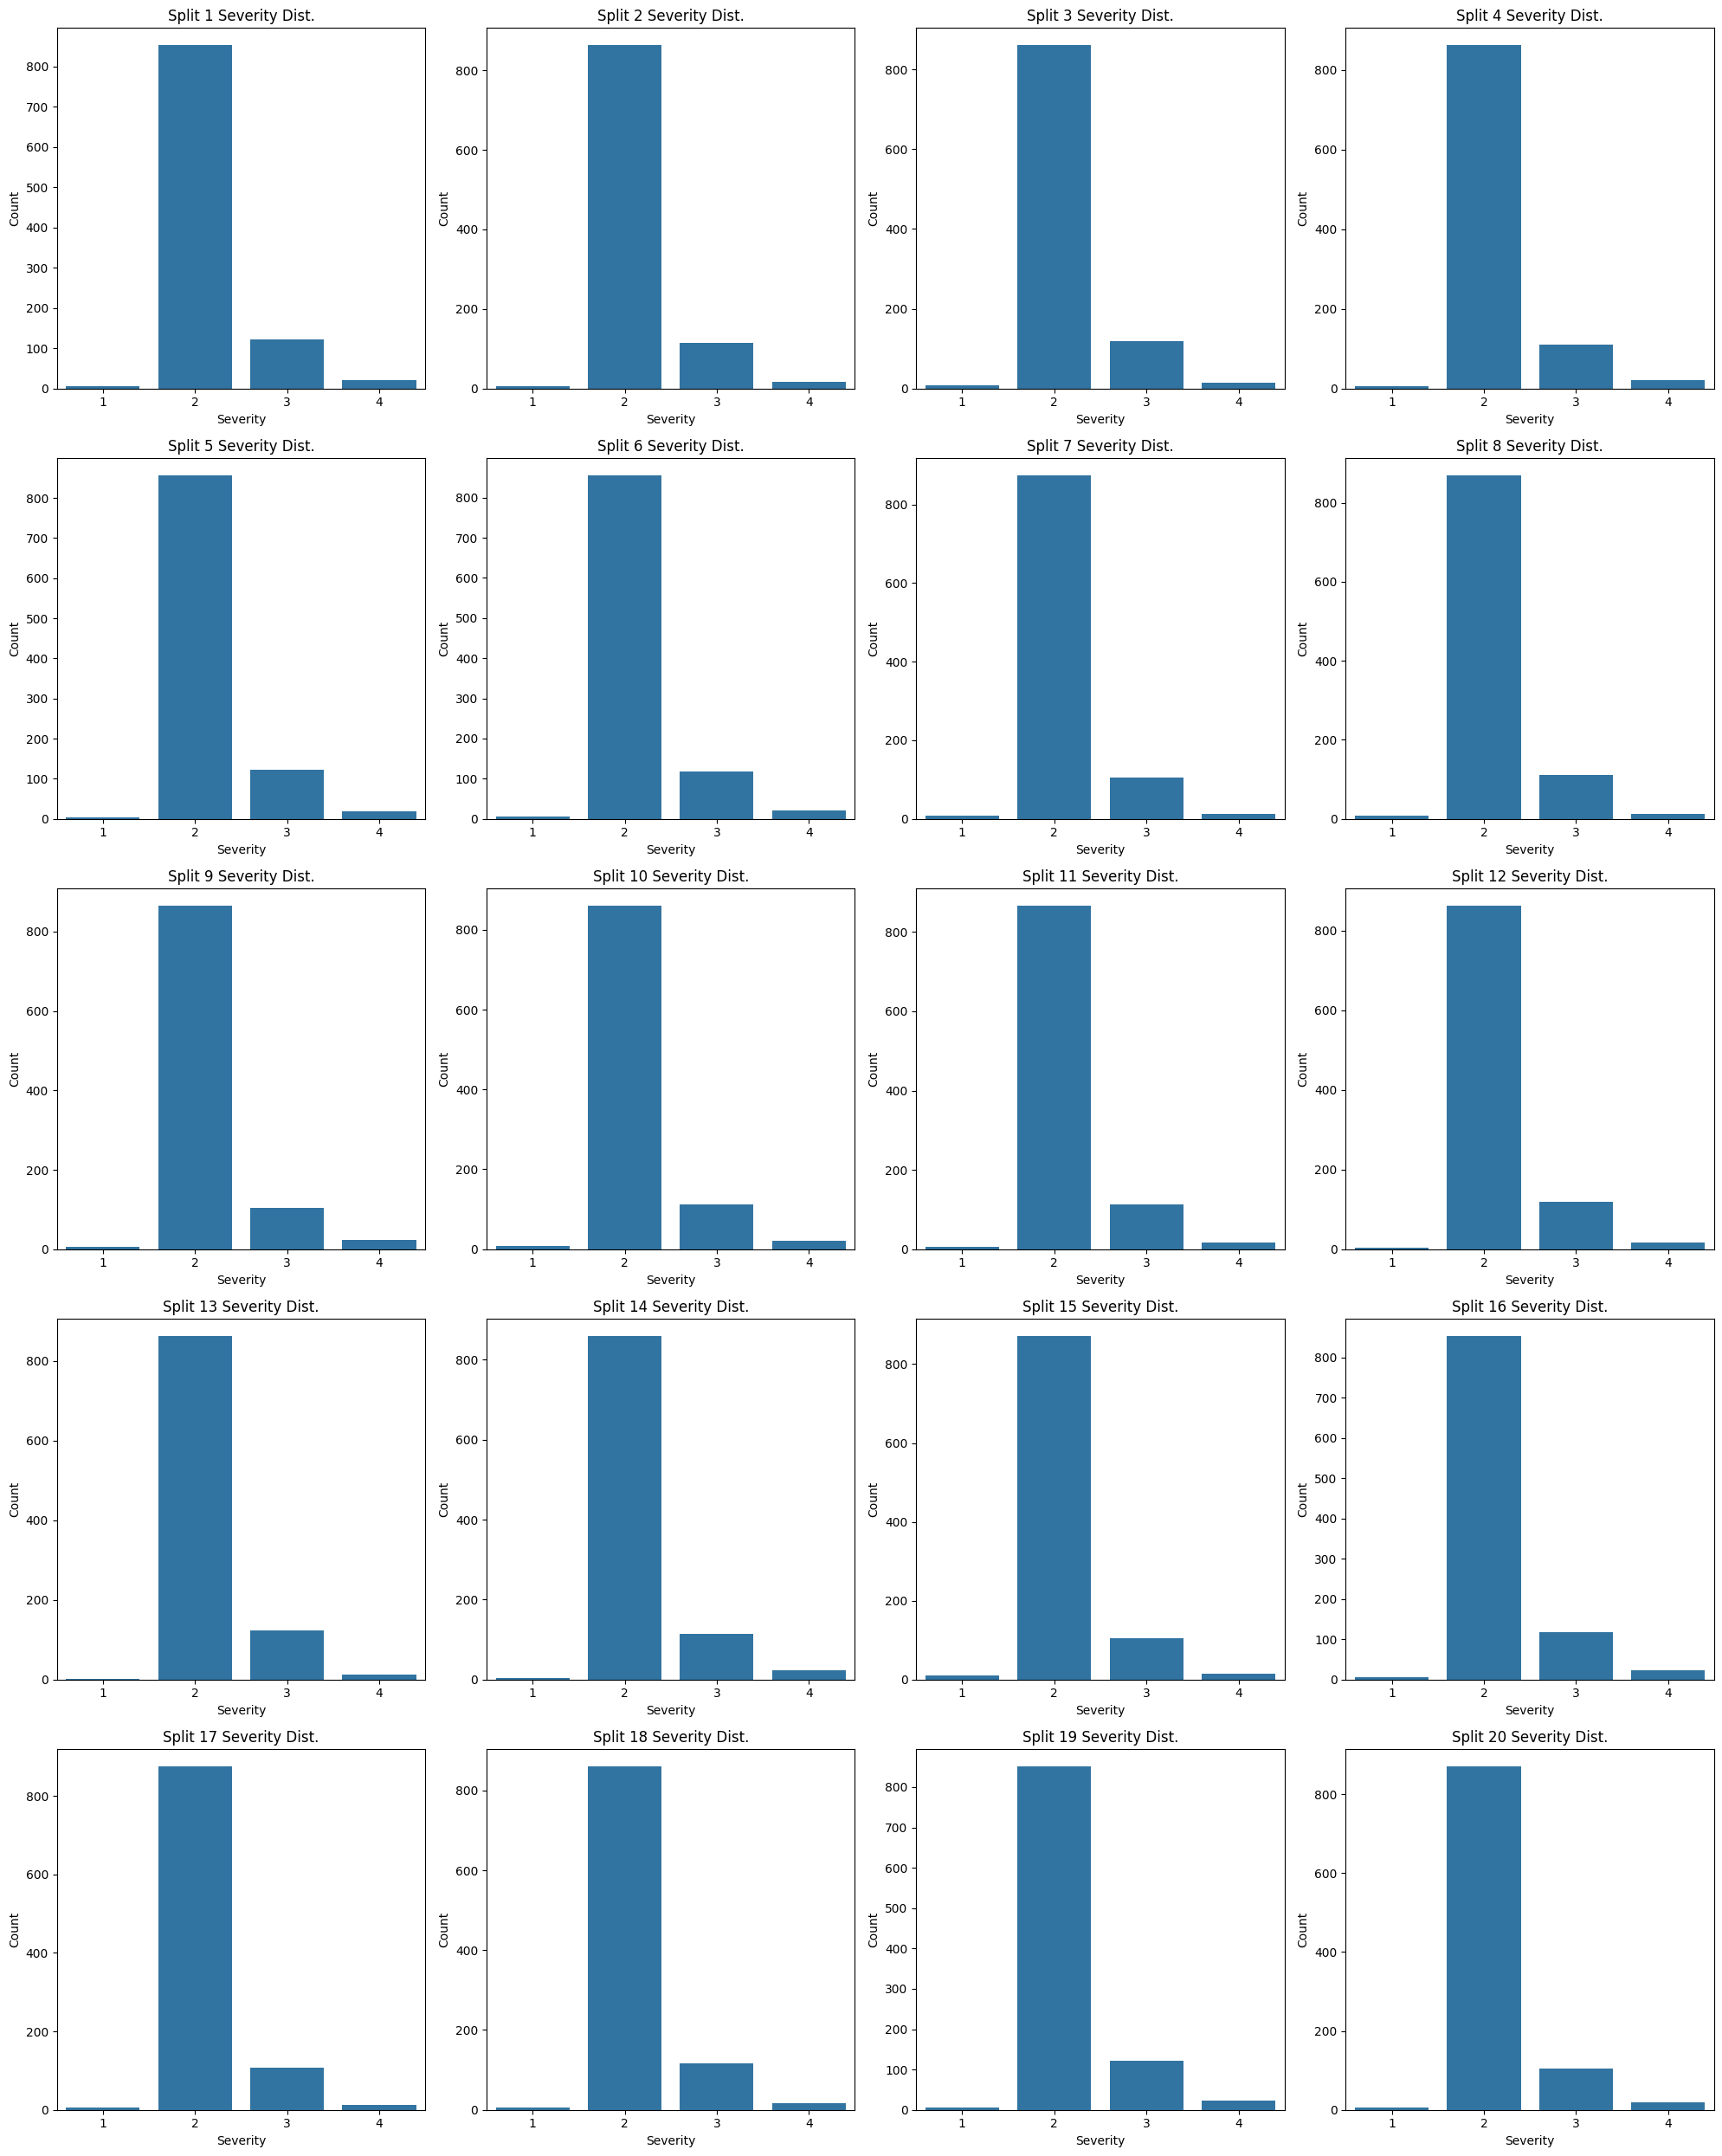

In [569]:
plt.figure(figsize=(20, 25))  # Adjust depending on display

for i, split in enumerate(split_dfs):
    plt.subplot(5, 4, i + 1)  # 5 rows x 4 cols = 20 plots
    sns.countplot(data=split, x='Severity')
    plt.title(f'Split {i+1} Severity Dist.')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()